In [2]:
import pandas as pd
from config.definitions import ROOT_DIR
from pathlib import Path
import sys
from pprint import pprint

path = Path.cwd() / 'core'
path = Path.cwd() / 'core' / 'machine_learning'
print(path.exists())
if str(path) not in sys.path:
    sys.path.insert(0, str(path))
pprint(sys.path)
from machine_learning.autogluon import *

%load_ext autoreload
%autoreload 2

True
['D:\\Repos\\deq_demonstrator\\core\\machine_learning',
 'D:\\Repos\\deq_demonstrator',
 'C:\\Users\\jkr\\AppData\\Local\\anaconda3\\envs\\work_bench_new\\python310.zip',
 'C:\\Users\\jkr\\AppData\\Local\\anaconda3\\envs\\work_bench_new\\DLLs',
 'C:\\Users\\jkr\\AppData\\Local\\anaconda3\\envs\\work_bench_new\\lib',
 'C:\\Users\\jkr\\AppData\\Local\\anaconda3\\envs\\work_bench_new',
 '',
 'C:\\Users\\jkr\\AppData\\Local\\anaconda3\\envs\\work_bench_new\\lib\\site-packages',
 'C:\\Users\\jkr\\AppData\\Local\\anaconda3\\envs\\work_bench_new\\lib\\site-packages\\win32',
 'C:\\Users\\jkr\\AppData\\Local\\anaconda3\\envs\\work_bench_new\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\jkr\\AppData\\Local\\anaconda3\\envs\\work_bench_new\\lib\\site-packages\\Pythonwin']


ModuleNotFoundError: No module named 'machine_learning'

In [4]:
load_path = Path(ROOT_DIR) / 'data' / \
                     '01_input' / '02_electric_loadprofiles_HTW' / \
                     'el_loadprofiles_HTW_processed.csv'
data = pd.read_csv(load_path)
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,64,65,66,67,68,69,70,71,72,73
0,2017-12-31 23:00:00+00:00,144.563361,297.387738,300.945404,116.887807,310.426281,52.147575,571.593960,567.866334,466.739229,...,464.344666,259.347152,1876.407438,701.225084,747.696604,61.613282,407.084995,652.673286,307.914996,543.307537
1,2017-12-31 23:15:00+00:00,146.271699,187.514944,412.258388,151.173534,306.162597,47.603450,634.184821,281.245974,309.303208,...,444.561983,231.473388,1816.884369,658.872761,725.380282,65.766073,122.840905,837.782225,365.311539,759.206095
2,2017-12-31 23:30:00+00:00,147.842260,207.996706,313.610345,128.904135,267.748533,67.450569,518.082198,441.756738,265.596122,...,480.456038,257.710933,1809.380722,644.682640,711.135672,94.679417,148.938875,740.393475,320.465021,632.773430
3,2017-12-31 23:45:00+00:00,216.274318,183.748541,328.528821,82.461234,273.615237,47.540595,457.086271,1265.228564,279.878289,...,558.493068,286.597564,1771.033836,1002.273124,387.792488,70.081908,168.961089,565.684981,249.733450,948.962080
4,2018-01-01 00:00:00+00:00,153.461027,260.209992,415.256961,117.429664,169.623352,81.842751,638.117140,1186.127128,305.055803,...,530.373860,243.081172,1317.735635,1889.274948,507.264517,83.206390,161.439317,994.879268,252.608514,650.026346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 21:45:00+00:00,236.659068,297.823463,1512.919900,240.000535,181.232132,908.508224,153.824648,738.730541,93.135237,...,372.708653,264.272823,745.911580,1974.043809,680.136571,49.224122,219.144836,429.130142,305.318385,826.643306
35036,2018-12-31 22:00:00+00:00,124.369127,351.577461,1513.418465,190.455401,312.143519,1778.663405,165.739816,927.312837,108.853471,...,439.455765,342.769476,665.594180,2091.168104,602.231502,79.525947,257.632490,359.068801,425.970286,753.365934
35037,2018-12-31 22:15:00+00:00,72.311351,473.637970,1547.907766,180.100730,343.412097,590.044398,170.812669,886.712813,166.273216,...,457.462581,381.298753,497.462056,2118.890253,592.250754,151.132041,192.675202,428.194038,324.745377,740.064787
35038,2018-12-31 22:30:00+00:00,185.226795,498.164702,1664.952335,233.138001,304.911561,317.217626,174.610439,925.014313,92.705723,...,546.422668,398.360035,554.310065,1350.303492,749.895908,166.723570,180.203022,664.342223,319.704273,710.603904


In [ ]:
column_rename_dict = {"Unnamed: 0": 'timestamp', "0": 'target'}

# Use the rename method to rename columns
data.rename(columns=column_rename_dict, inplace=True)

data["timestamp"] = pd.to_datetime(data["timestamp"], utc=False)
data["timestamp"] = data["timestamp"].dt.tz_localize(None)

max_datetime = pd.to_datetime('2018-01-23 15:00:00', utc=False)

# Split the DataFrame based on the threshold
train_data_df = data[data['timestamp'] <= max_datetime]
test_data_df = data[data['timestamp'] > max_datetime]

### actually use the forecaster class
pred_1 = AutoGluonForecaster()
pred_1.train_model(train_data_df, 48)
forecast = pred_1.predict_model(train_data_df)

### some plotting for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))

y_past = train_data_df.loc[:,"target"]
y_pred = forecast
y_test = test_data_df.loc[:,"target"][:48]

plt.plot(y_past[-200:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend()

plt.show()

D:\Repos\deq_demonstrator\core\machine_learning\autogluon.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[self.item_id_name] = self.item_id
================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: high_quality
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'MASE',
 'excluded_model_types': None,
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'high_quality',
 'num_val_windows': 1,
 'prediction_length': 48,
 'random_seed': None,
 'target': 'target',
 'time_limit': 600,
 'verbosity': 2}
Provided training data set with 2177 rows, 1 items (item = single time series). Average time series length is 2177.0. Data frequency is '15T'.
AutoGluon will save m

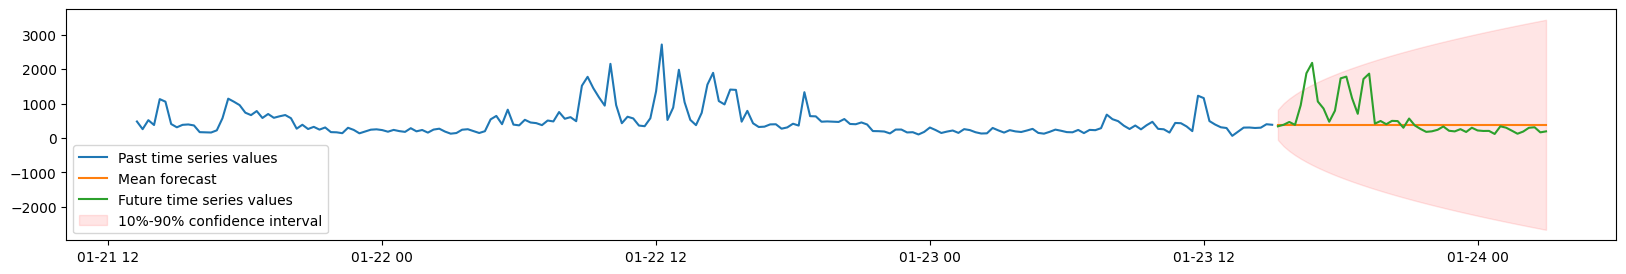

In [28]:
plt.figure(figsize=(20, 3))

y_past = train_data_df.set_index('timestamp').loc[:,"target"]
y_pred = forecast
y_test = test_data_df.set_index('timestamp').loc[:,"target"][:48]

plt.plot(y_past[-200:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend()

plt.show()

In [23]:
y_past

timestamp
2017-12-31 23:00:00    144.563361
2017-12-31 23:15:00    146.271699
2017-12-31 23:30:00    147.842260
2017-12-31 23:45:00    216.274318
2018-01-01 00:00:00    153.461027
                          ...    
2018-01-23 14:00:00    304.203181
2018-01-23 14:15:00    290.631572
2018-01-23 14:30:00    299.593211
2018-01-23 14:45:00    399.317914
2018-01-23 15:00:00    383.675180
Name: target, Length: 2177, dtype: float64

In [20]:
y_past

0       144.563361
1       146.271699
2       147.842260
3       216.274318
4       153.461027
           ...    
2172    304.203181
2173    290.631572
2174    299.593211
2175    399.317914
2176    383.675180
Name: target, Length: 2177, dtype: float64

In [36]:
use_df = train_data_df.iloc[-60:].copy()
use_df

,timestamp,target,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,item_id
2117,2018-01-23 00:15:00,230.568954,165.128774,513.386428,148.978945,209.097596,81.710938,146.728672,236.040418,859.970025,...,159.577580,928.646431,408.907990,484.061789,402.160303,348.022078,463.939546,348.770266,305.622690,case1
2118,2018-01-23 00:30:00,145.604896,208.179578,487.466319,150.921993,123.596511,51.805044,178.324022,126.023228,775.068727,...,233.177675,956.149319,310.856417,810.822602,484.259066,306.844016,454.275914,404.560317,286.712919,case1
2119,2018-01-23 00:45:00,186.219834,211.321394,458.722281,139.626523,139.657743,65.684510,151.553962,78.697739,561.910939,...,234.512876,1184.360667,402.345755,1054.020346,430.857641,358.740366,633.090001,426.961442,210.821641,case1
2120,2018-01-23 01:00:00,217.263071,254.672156,450.512293,159.219131,137.410515,75.449975,169.320589,67.198534,448.908648,...,240.981373,1236.290559,382.517507,697.572194,465.328898,397.561911,444.778716,395.433663,194.505659,case1
2121,2018-01-23 01:15:00,148.266008,286.741973,402.481955,69.829225,98.323300,61.020939,245.482409,51.838540,281.857272,...,190.464857,667.995527,396.043168,332.374857,474.473518,375.237121,364.540438,385.274120,140.455486,case1
2122,2018-01-23 01:30:00,256.888849,206.263358,443.758666,133.026476,243.155945,63.698735,183.098019,129.437585,297.165984,...,209.080082,511.771140,474.702125,499.133948,448.335719,233.403409,421.213543,353.689515,161.373123,case1
2123,2018-01-23 01:45:00,229.347608,193.245333,608.457274,147.463201,245.980747,61.282199,162.872168,206.654915,226.280079,...,162.433907,366.722095,443.742512,1149.066079,553.567608,159.172063,453.046177,337.290411,257.137202,case1
2124,2018-01-23 02:00:00,167.033197,382.510984,526.060638,256.249440,277.053161,65.638916,147.048378,239.130024,200.854807,...,278.810650,270.915693,407.698698,596.464440,487.014868,146.313699,490.265046,428.778598,248.383979,case1
2125,2018-01-23 02:15:00,130.137374,436.661307,377.130840,251.026753,153.603656,76.062569,179.393369,189.352542,300.230986,...,181.680943,218.970124,369.444011,528.144464,473.950773,225.901131,461.308659,410.408719,295.157716,case1
2126,2018-01-23 02:30:00,135.767385,418.302696,494.926181,195.626293,148.131709,85.809770,169.276239,144.574014,385.081643,...,266.556166,229.834651,371.910213,548.875510,511.743039,164.195418,415.540489,270.080269,305.518104,case1


In [38]:
pred_1.predict_model(use_df)

Global seed set to 123
Model not specified in predict, will default to the model with the best validation score: Naive


,mean,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
timestamp,,,,,,,,,,
2018-01-23 15:15:00,383.67518,139.362837,223.230247,283.704550,335.377611,383.67518,431.972748,483.645810,544.120112,627.987522
2018-01-23 15:30:00,383.67518,38.165352,156.771780,242.295359,315.372104,383.67518,451.978256,525.055000,610.578579,729.185007
2018-01-23 15:45:00,383.67518,-39.486210,105.776404,210.520969,300.021338,383.67518,467.329022,556.829390,661.573955,806.836569
2018-01-23 16:00:00,383.67518,-104.949505,62.785314,183.733919,287.080043,383.67518,480.270316,583.616440,704.565045,872.299864
2018-01-23 16:15:00,383.67518,-162.623825,24.909403,160.134055,275.678534,383.67518,491.671825,607.216304,742.440956,929.974184
2018-01-23 16:30:00,383.67518,-214.765396,-9.333037,138.798147,265.370782,383.67518,501.979577,628.552213,776.683397,982.115756
2018-01-23 16:45:00,383.67518,-262.714520,-40.822212,119.177754,255.891825,383.67518,511.458534,648.172605,808.172571,1030.064879
2018-01-23 17:00:00,383.67518,-307.344476,-70.131620,100.915538,247.069028,383.67518,520.281332,666.434821,837.481979,1074.694835
2018-01-23 17:15:00,383.67518,-349.261847,-97.659619,83.763289,238.782475,383.67518,528.567884,683.587070,865.009978,1116.612206
